# Seaborn Practice 
The goal for this notebook is to do some data exploration with one of the seaborn datasets. 

I love penguins so I'm super excited to explore this dataset

In [2]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# how to see all the seaborn datasets
print (sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [9]:
# import penguins dataset as penguins
penguins = sns.load_dataset('penguins')

In [92]:
# create custom color palette that is penguin inspired
# color palette source https://www.schemecolor.com/world-penguin-day-theme-colors.php
peng_palette = ['#D0894B', '#D9B45D', '#253542', '#2B4753', '#DBE3E5', '#F6F6F6']
# set style to dark and use custom palette
sns.set_theme(style = 'darkgrid', palette = peng_palette)

I found this Kaggle resource that I am looking through while exploring the data (https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris)

In [12]:
# There are 7 columns. Species, island, bill length, bill, depth, flipper length, body mass, sex 
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
penguins.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [16]:
# I saw this on the afore mentioned kaggle site. This is the credit that author gave.
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

# NOTE I should put this function in my custom functions.py when I get around to compiling it all. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing_values_table(penguins)

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


The 3 different types of species Adelie, Gentoo, Chinstrap, in this dataset are different types of penguins.
So it would be reasonable to assume (I don't have the docs for this dataset) that these are measurements of specific penguins of those three species. They measured their bills, and wings, and recored their weight and sex. Also what Island they were on. 

In [49]:
#there are 3 different types of species Adelie, Gentoo, Chinstrap
# place value_counts in a variable (series)
types_of_penguins = penguins['species'].value_counts()
types_of_penguins

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [53]:
# types of penguins is a series
type(types_of_penguins)

pandas.core.series.Series

In [58]:
# 114.67
mean_num_of_species = types_of_penguins.mean()

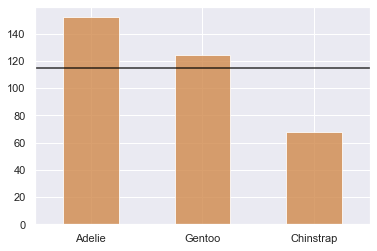

In [91]:
# use pandas plot.bar function to get quick plot to visually see the difference in amount of differnt penguins in dataframe
types_of_penguins.plot.bar(rot = 0, alpha = 0.8)

plt.axhline(mean_num_of_species, c = 'black', alpha = .8)
plt.show()

In [65]:
# the break down of penguin measured on what Islands (species and island cross section to come) 
islands_series = penguins['island'].value_counts()
islands_series

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [67]:
#average number of penguin entries per island 
islands_series.mean()

114.66666666666667

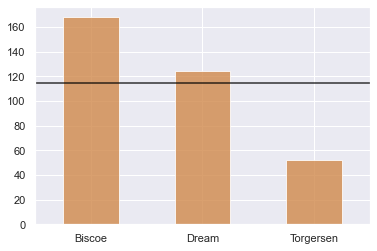

In [90]:
islands_series.plot.bar(rot = 0, alpha = 0.8)
plt.axhline(islands_series.mean(), c = 'black', alpha = 0.8)

plt.show()

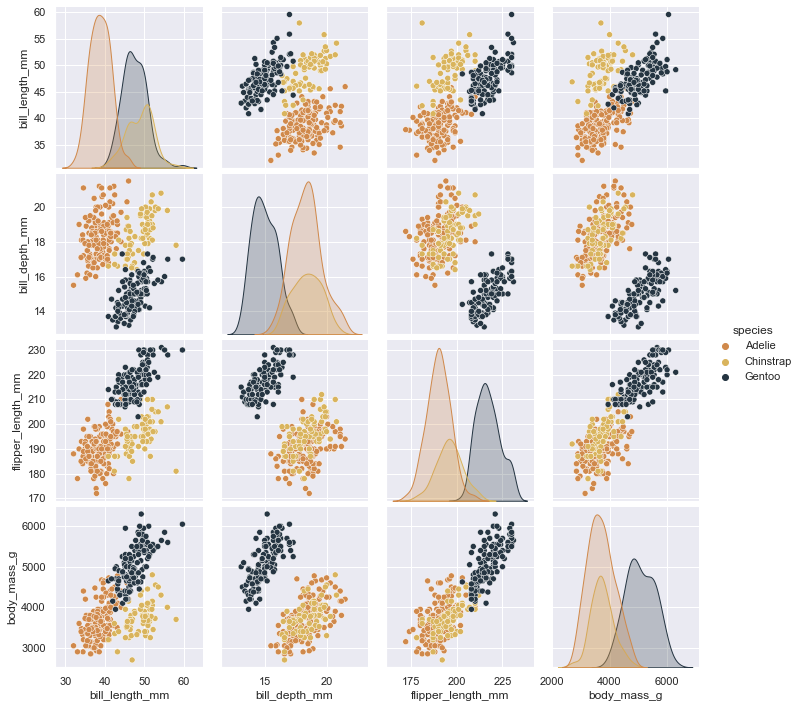

In [96]:
sns.pairplot(penguins, hue = 'species' ) 

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

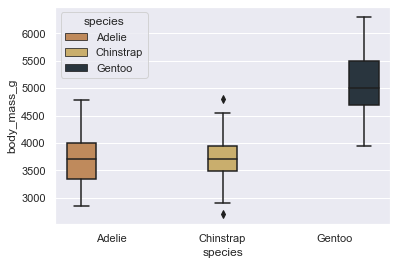

In [101]:
# how big are the penguins by species
sns.boxplot(data = penguins, hue = 'species', x = 'species', y = 'body_mass_g')

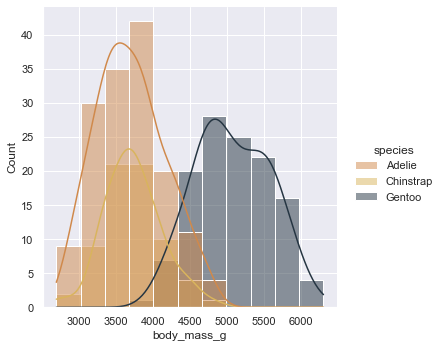

In [109]:
sns.displot(data = penguins, hue = 'species',  x = 'body_mass_g', kde = True)

Takeaway: The Gentoo penguins are on average much larger than the Adelie and Chinstrap penguins. This is easier to see on the box plot
- Questions to ask: 
    - Breakdown of penguins per island
    - is there a difference in size between penguins on different islands? Access to food?

<AxesSubplot:xlabel='island', ylabel='Count'>

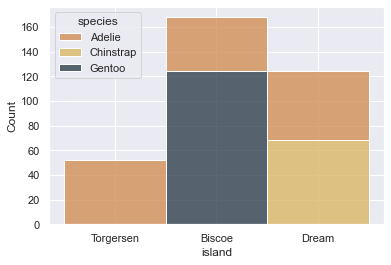

In [120]:
# break down of penguin species per island
sns.histplot(data = penguins, x = 'island', hue = 'species', multiple = 'stack')

Takeaways: 
- Adelie penguins in the study were on all three islands (Torgersen, Biscoe, Dream)
    - Are they the only type of penguin on multiple islands?
    - Do they get along with other types of penguins
    - Was this just a limitation of the study? 
- Gentoo penguins only had measurements taken on Biscoe Island
- Chinstrap penguins were only observed (aka taken measurements of) on Dream island